# Evaluation of ML Models for EMPO_3
* Load models from model_joblibs folder
* Make table comparing performance metrics of each model
    * Confusion Matrix
    * Accuracy
    * Classification Report: F1 score

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from helpers import (get_training_observations, 
                     get_training_labels,
                     get_test_observations,
                     get_test_labels,
                     get_protein_proportions)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

import xgboost as xgb
# sklearn package functions
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


/Users/Sophie/opt/anaconda3/envs/xgb/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Load data and models

In [5]:
# load training and test data
x_test = get_test_observations()
y_test = get_test_labels()['EMPO_3']
models = {}

Getting all test observations from 'metagenome_classification.db'...
Getting all test labels from 'metagenome_classification.db'...


In [6]:
# load XGB model
models['XGB'] = {}
models['XGB']['model'] = load('../model_joblibs/xgb_model.joblib')
xgb_le=load('../model_joblibs/xgb_labelEncoder.joblib')
# encode y_test labels
labels = np.array(xgb_le.classes_)
labels
y_test = xgb_le.transform(y_test)
# predict with testing data set
xgb_pred = models['XGB']['model'].predict(x_test).astype('int64')
# reverse transform labels so that we can compare with other models
y_test = xgb_le.inverse_transform(y_test)
models['XGB']['pred'] = xgb_le.inverse_transform(xgb_pred)
# d_test = xgb.DMatrix(x_test, label=y_test)

In [8]:
# load decision tree model
models['Decision Tree'] = {}
models['Decision Tree']['model'] = load('../model_joblibs/decision_tree.joblib')
models['Decision Tree']['pred'] = models['Decision Tree']['model'].predict(x_test)

## Accuracy

In [9]:
for model in models.keys():
    print(f"{model} Test Set Accuracy", accuracy_score(y_test, models[model]['pred']))

XGB Test Set Accuracy 0.9365671641791045
Decision Tree Test Set Accuracy 0.8843283582089553


## Confusion Matrix

XGB Confusion Matrix


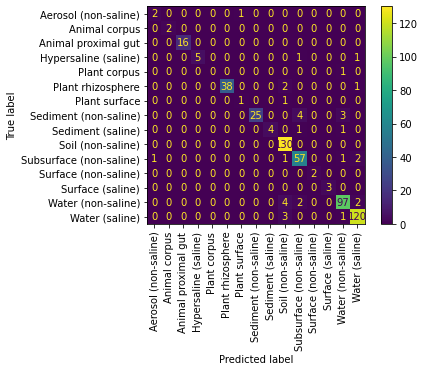

Decision Tree Confusion Matrix


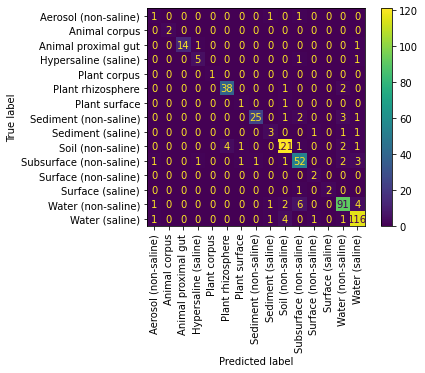

In [10]:
def cm(y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels)
    disp.plot()
    plt.xticks(rotation=90)
    plt.show()
    
# display confusion matrix for xgb_pred
for model in models.keys():
    print (f"{model} Confusion Matrix")
    cm(models[model]['pred'])

# Classification Report

In a nutshell, the major difference between ROC AUC and F1 is related to class imbalance. Here is a summary of reading many StackOverflow threads on how to choose one over the other:

**If you have a high class imbalance, always choose the F1 score because a high F1 score considers both precision and recall.** To get a high F1, both false positives and false negatives must be low. On the other hand, ROC AUC can give precious high scores with a high enough number of false positives. Besides, you can also think of the ROC AUC score as the average of F1 scores (both good and bad) evaluated at various thresholds. Always use F1 when you have a class imbalance. Higher ROC AUC does not necessarily mean a better classifier.

[Source: Comprehensive Guide to Multiclass Classification Metrics](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)

In [11]:
for model in models.keys():
    print(f"{model} Classification Report")
    print(classification_report(y_test, models[model]['pred'], zero_division=0))
    # zero_divison hides UndefinedMetricWarning: zero scores are due to labels not appearing in y_pred
    # In these instances, refer to the 'weighted avg'

XGB Classification Report
                         precision    recall  f1-score   support

   Aerosol (non-saline)       0.67      0.67      0.67         3
          Animal corpus       1.00      1.00      1.00         2
    Animal proximal gut       1.00      1.00      1.00        16
   Hypersaline (saline)       1.00      0.71      0.83         7
           Plant corpus       0.00      0.00      0.00         1
      Plant rhizosphere       1.00      0.93      0.96        41
          Plant surface       0.50      0.50      0.50         2
  Sediment (non-saline)       1.00      0.78      0.88        32
      Sediment (saline)       1.00      0.67      0.80         6
      Soil (non-saline)       0.92      1.00      0.96       130
Subsurface (non-saline)       0.88      0.92      0.90        62
   Surface (non-saline)       1.00      1.00      1.00         2
       Surface (saline)       1.00      1.00      1.00         3
     Water (non-saline)       0.93      0.92      0.93       10